In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
class AdalineGD(object):
    """
    Parameters
    --------------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
    
    Attributes
    --------------------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-Squares cost function value for each epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        '''
        Fits the Training Data
        
        Parameters
        -------------------
        X: {array-like}, shape = [n_examples, n_features]
            training vectors
        y: {array-like}, shape = [n_examples]
            Target values
            
        Returns:
            Self: object
        '''
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        
        '''
        Compute linear activation
        In this case does nothing because it is simply an identity function
        '''
        return X
    
    def predict(self, X):
        ''' Return class label after unit setp '''
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

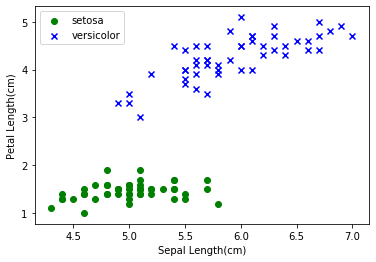

In [3]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(data_url, header=None, encoding='utf-8')
df.head()


import matplotlib.pyplot as plt
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='green', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal Length(cm)')
plt.legend()
plt.show()

/home/jared/python3.7dev1/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in square
/home/jared/python3.7dev1/lib/python3.7/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


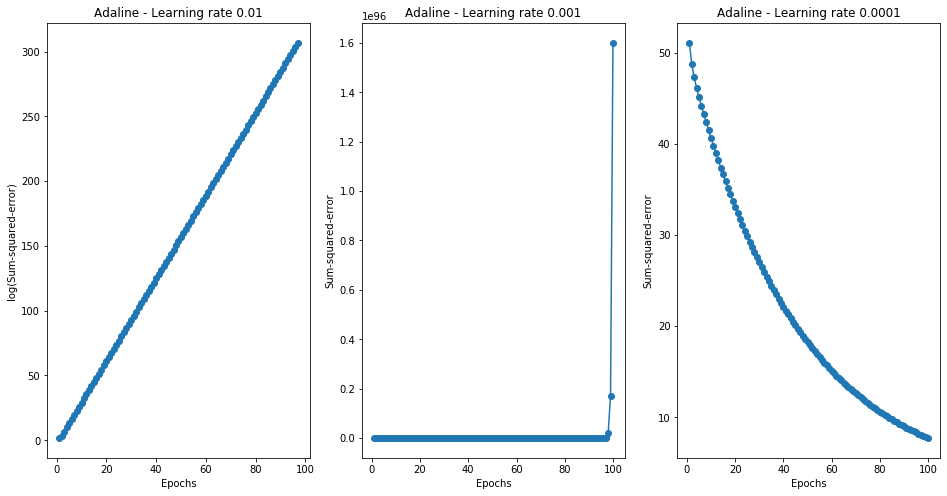

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(16,8))
ada1 = AdalineGD(n_iter = 100, eta =0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=100, eta=0.001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.001')

ada3 = AdalineGD(n_iter=100, eta=0.0001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()

Many machine learning algorithms we encounter will require some sort of feature scaling for optimal performance...
Gradient descent which we just displayed is one of the many algorithms that benefits from feature scaling. 
We will use a feature scaling method called standardization, which gives our data the properties of a standard normal distribution, specifically zero-mean and unit variance.
This will help our gradient descent learn to converge more quickly..

In [5]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')


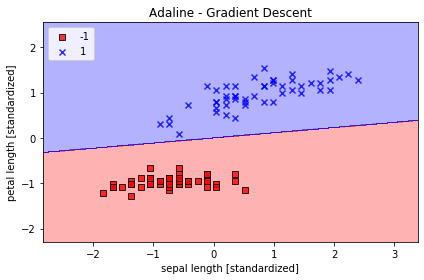

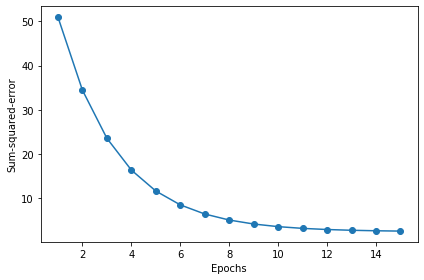

In [7]:
#implementing our adaline again after standardization:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

In [8]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent 
        cycles.
    random_state : int
        Random number generator seed for random weight 
        initialization.
    
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training examples in each epoch.
    
    
    """
    def __init__(self, eta=0.01, n_iter=10,
              shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of 
            examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        
        Returns
        -------
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                   size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                        >= 0.0, 1, -1)


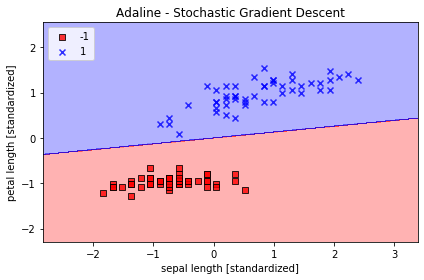

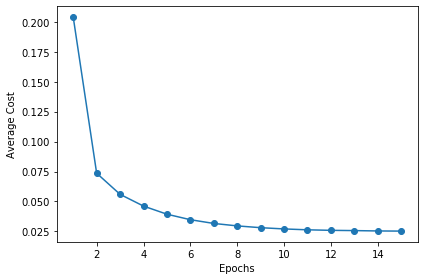

In [9]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()